<a href="https://colab.research.google.com/github/ParthDhabalia1024/sample/blob/main/Codsoft_Task_01(Movie_genre_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_data = pd.read_csv("/content/train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data.head()


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_data = pd.read_csv("/content/test_data.txt", sep=':::', names=['Title', 'Description'], engine='python')
test_data.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
combined_data = pd.concat([train_data, test_data], ignore_index=True)
data = combined_data


In [ ]:
data = data.dropna()

In [ ]:
corpus = data["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))

In [ ]:
word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
def get_sentence_embedding(sentence):
    words = re.findall(r'\w+', sentence.lower())
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

In [ ]:
data["embeddings"] = data["Description"].apply(get_sentence_embedding)
X = pd.DataFrame(data["embeddings"].to_list())

label_encoder = LabelEncoder()
data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])
y = data["genre_encoded"]

<ipython-input-13-a71330e6e3d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["embeddings"] = data["Description"].apply(get_sentence_embedding)
<ipython-input-13-a71330e6e3d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])


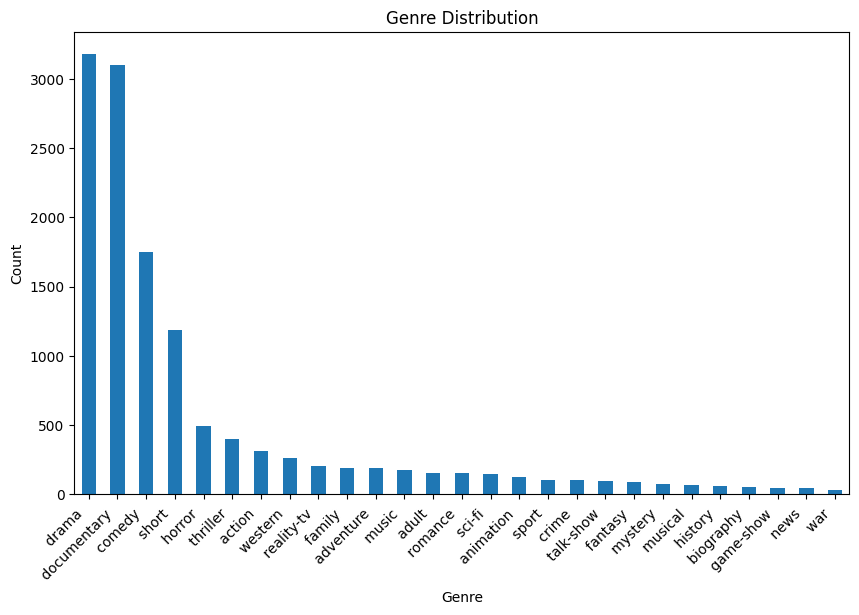

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
genre_counts = data["Genre"].value_counts()
genre_counts.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = RandomForestClassifier(n_estimators=100, random_state=62)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=62)

In [ ]:
predictions = model.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Precision: 0.3196561785709305
Recall: 0.42818003913894326
Accuracy: 0.42818003913894326


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         9
           5       0.25      0.23      0.24       330
           6       0.00      0.00      0.00        18
           7       0.49      0.84      0.62       614
           8       0.42      0.75      0.54       641
           9       0.00      0.00      0.00        44
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        11
          13       0.38      0.03      0.05       113
          14       0.50      0.03      0.05        40
          15       0.00      0.00      0.00        17
          16       0.00      0.00      0.00        16
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0   0   0   0   0  18   0  10  30   0   0   0   0   1   0   0   0   0
    0   0   0   0   1   0   0   0   1]
 [  0   0   0   0   0   6   0   8  22   0   0   0   0   0   0   0   0   0
    0   0   0   3   0   0   0   0   0]
 [  0   0   0   0   0   5   0  10  14   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   5   0   3  12   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5   4   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  77   0  85 160   0   0   0   0   2   0   0   0   0
    0   0   0   6   0   0   0   0   0]
 [  0   0   0   0   0   2   0   4  12   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  24   0 515  65   0   0   0   0   1   1   0   0   0
    1   0   0   7   0   0   0   0   0]
 [  0   0   0   0   0  50   0 101 483   0   0   0   0   0   0   0   0   0
    

In [ ]:
def train_model():
    train_data = pd.read_csv("/content/train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
    test_data = pd.read_csv("/content/test_data.txt", sep=':::', names=['Title', 'Description'], engine='python')
    combined_data = pd.concat([train_data, test_data], ignore_index=True)
    data = combined_data
    data = data.dropna()
    corpus = data["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))
    word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)


    def get_sentence_embedding(sentence):
        words = re.findall(r'\w+', sentence.lower())
        vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        return sum(vectors) / len(vectors) if vectors else [0] * 100

    data["embeddings"] = data["Description"].apply(get_sentence_embedding)
    X = pd.DataFrame(data["embeddings"].to_list())
    label_encoder = LabelEncoder()
    data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])
    y = data["genre_encoded"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    return model, label_encoder

def predict_genre(model, label_encoder, new_descriptions):
    new_embeddings = [get_sentence_embedding(desc) for desc in new_descriptions]
    new_X = pd.DataFrame(new_embeddings)
    new_predictions = model.predict(new_X)
    predicted_genres = label_encoder.inverse_transform(new_predictions)

    return predicted_genres

trained_model, genre_label_encoder = train_model()


<ipython-input-23-86672bc8c5fa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["embeddings"] = data["Description"].apply(get_sentence_embedding)
<ipython-input-23-86672bc8c5fa>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])


In [ ]:
new_descriptions = ["A group of friends embark on an adventurous journey.","In a dystopian future, a hero rises to save the world.","A heartwarming story of family and friendship."]


predicted_genres = predict_genre(trained_model, genre_label_encoder, new_descriptions)

for desc, genre in zip(new_descriptions, predicted_genres):
    print(f"Description: {desc}")
    print(f"Predicted Genre: {genre}")
    print()

Description: A group of friends embark on an adventurous journey.
Predicted Genre:  short 

Description: In a dystopian future, a hero rises to save the world.
Predicted Genre:  comedy 

Description: A heartwarming story of family and friendship.
Predicted Genre:  drama 

